In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
import pickle

with open('../../assets/credit.pkl', 'rb') as file:
  X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(file)

In [3]:
X_credit_train.shape, y_credit_train.shape

((1500, 3), (1500,))

In [4]:
X_credit_test.shape, y_credit_test.shape

((500, 3), (500,))

In [5]:
import numpy as np

In [6]:
X_credit = np.concatenate((X_credit_train, X_credit_test), axis=0)
X_credit.shape

(2000, 3)

In [7]:
X_credit

array([[-1.3754462 ,  0.50630999,  0.10980934],
       [ 1.45826409, -1.64894017, -1.21501497],
       [-0.79356829,  0.22531104, -0.43370226],
       ...,
       [ 1.37445674, -1.05746369, -1.12564819],
       [-1.57087737, -0.6348826 , -0.36981671],
       [-1.03572293, -0.93978209,  0.04244312]])

In [8]:
y_credit = np.concatenate((y_credit_train, y_credit_test))
y_credit.shape

(2000,)

In [9]:
y_credit

array([0, 0, 0, ..., 0, 1, 1])

## Árvore de decisão

In [10]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

In [11]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

({'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'splitter': 'best'},
 0.983)

## Random forest

In [12]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 40, 100, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

In [13]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

({'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.986)

## kNN

In [14]:
parameters = {
    "n_neighbors": [3, 5, 10, 20],
    "p": [1, 2]
}

In [15]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

({'n_neighbors': 20, 'p': 1}, 0.9800000000000001)

## Regressão logística

In [16]:
parameters = {
    "tol": [0.0001, 0.00001, 0.000001],
    "C": [1.0, 1.5, 2.0],
    "solver": ["lbfgs", "sag", "saga"]
}

In [17]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

({'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}, 0.9484999999999999)

## SVM

In [18]:
parameters = {
    "tol": [0.001, 0.0001, 0.00001],
    "C": [1.0, 1.5, 2.0],
    "kernel": ["rbf", "linear", "poly", "sigmoid"]
}

In [19]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

({'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}, 0.9829999999999999)

## Redes neurais

In [20]:
parameters = {
    'activation': ['relu', 'logistic', 'tahn'],
    'solver': ['adam', 'sgd'],
    'batch_size': [10, 56]
}

In [21]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters)
grid_search.fit(X_credit, y_credit)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multi

({'activation': 'relu', 'batch_size': 10, 'solver': 'adam'},
 0.9975000000000002)

## Validação cruzada

In [22]:
from sklearn.model_selection import cross_val_score, KFold

In [23]:
results_tree = []
results_random_forest = []
results_knn = []
results_logistica = []
results_svm = []
results_rede_neural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    tree = DecisionTreeClassifier(
        criterion="entropy",
        min_samples_leaf=1,
        min_samples_split=5,
        splitter="best"
    )

    scores = cross_val_score(tree, X_credit, y_credit, cv=kfold)
    results_tree.append(scores.mean())

    random_forest = RandomForestClassifier(
        criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
    scores = cross_val_score(random_forest, X_credit, y_credit, cv=kfold)
    results_random_forest.append(scores.mean())

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, X_credit, y_credit, cv=kfold)
    results_knn.append(scores.mean())

    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistica, X_credit, y_credit, cv=kfold)
    results_logistica.append(scores.mean())

    svm = SVC(kernel='rbf', C=2.0)
    scores = cross_val_score(svm, X_credit, y_credit, cv=kfold)
    results_svm.append(scores.mean())

    neural_network = MLPClassifier(
        activation='relu', batch_size=56, solver='adam')
    scores = cross_val_score(neural_network, X_credit, y_credit, cv=kfold)
    results_rede_neural.append(scores.mean())

/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multi

In [24]:
import pandas as pd

In [25]:
results = pd.DataFrame({
    'Arvore': results_tree,
    'Random forest': results_random_forest,
    'KNN': results_knn,
    'Logistica': results_logistica,
    'SVM': results_svm,
    'Rede neural': results_rede_neural
})
results

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.9865,0.9825,0.9815,0.9475,0.9845,0.9970
1,0.9845,0.9840,0.9800,0.9465,0.9840,0.9980
2,0.9905,0.9830,0.9795,0.9470,0.9865,0.9975
3,0.9875,0.9840,0.9780,0.9460,0.9850,0.9970
4,0.9890,0.9870,0.9820,0.9465,0.9850,0.9970
5,0.9890,0.9835,0.9780,0.9465,0.9845,0.9975
6,0.9885,0.9845,0.9805,0.9470,0.9860,0.9965
7,0.9875,0.9810,0.9800,0.9480,0.9850,0.9970
8,0.9865,0.9810,0.9795,0.9465,0.9840,0.9970
9,0.9870,0.9875,0.9820,0.9465,0.9845,0.9970


In [26]:
results.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987317,0.983550,0.980050,0.946950,0.985083,0.997183
std,0.001684,0.001621,0.001533,0.000687,0.001280,0.000464
min,0.984000,0.980500,0.977000,0.945500,0.982000,0.996000
25%,0.986125,0.982625,0.979000,0.946500,0.984125,0.997000
50%,0.987500,0.983500,0.980000,0.947000,0.985000,0.997000
75%,0.988500,0.984500,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.987500,0.982500,0.948500,0.987500,0.998500


In [27]:
(results.std() / results.mean()) * 100

Arvore           0.170565
Random forest    0.164782
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede neural      0.046524
dtype: float64

# Teste de normalidade nos resultados

In [28]:
alpha = 0.05 # confiabilidade dos testes de 95%

In [29]:
from scipy.stats import shapiro

In [30]:
results_shapiro = shapiro(results_tree), shapiro(results_random_forest), shapiro(results_knn), shapiro(results_logistica), shapiro(results_svm), shapiro(results_rede_neural)
results_shapiro

(ShapiroResult(statistic=0.9719575047492981, pvalue=0.5940122604370117),
 ShapiroResult(statistic=0.9580259919166565, pvalue=0.2755570709705353),
 ShapiroResult(statistic=0.9584025144577026, pvalue=0.28181397914886475),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9622980356216431, pvalue=0.354146808385849),
 ShapiroResult(statistic=0.8611236810684204, pvalue=0.0010696431854739785))

In [31]:
for i, result in enumerate(results_shapiro):
    if result.pvalue <= alpha:
        print(f"Os dados '{results.columns[i]}' não segue uma distribuição normal")
        continue
    
    print(f"Os dados '{results.columns[i]}' segue uma distribuição normal")

Os dados 'Arvore' segue uma distribuição normal
Os dados 'Random forest' segue uma distribuição normal
Os dados 'KNN' segue uma distribuição normal
Os dados 'Logistica' segue uma distribuição normal
Os dados 'SVM' segue uma distribuição normal
Os dados 'Rede neural' não segue uma distribuição normal


In [32]:
import seaborn as sns

/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/seaborn

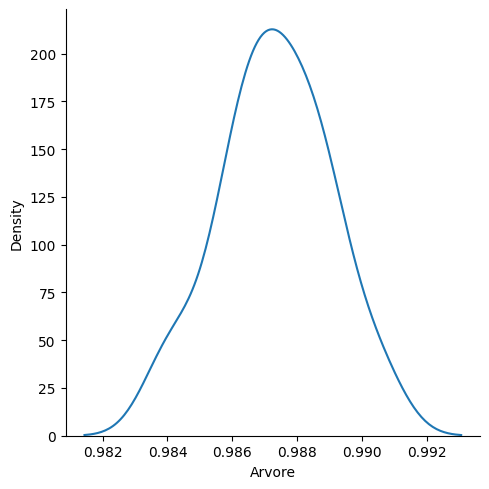

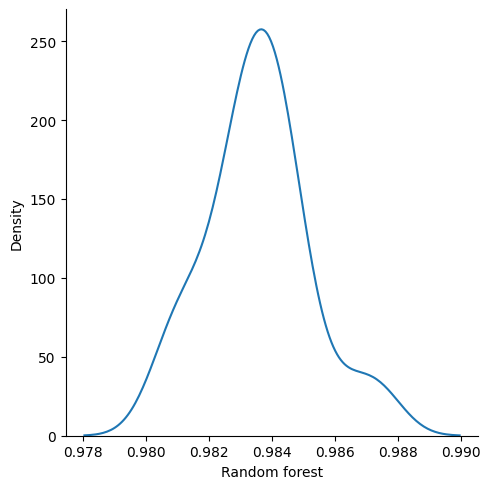

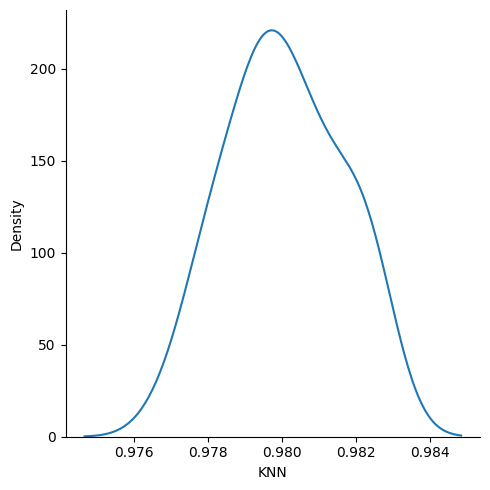

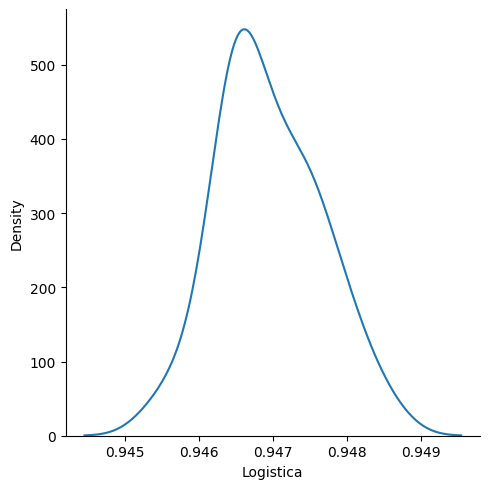

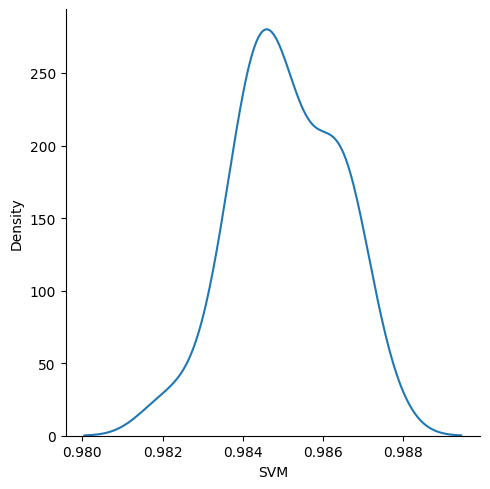

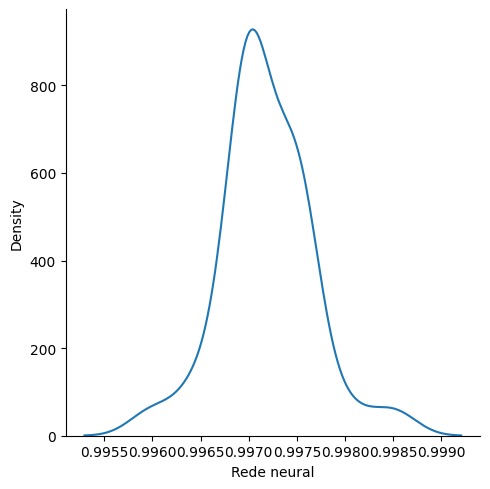

In [33]:
for i in range(len(results.columns)):
    sns.displot(results.iloc[:, i], kind="kde");

In [34]:
from scipy.stats import f_oneway

In [35]:
_, p = f_oneway(results_tree, results_random_forest, results_knn, results_logistica, results_svm, results_rede_neural)
p

9.618982888938613e-188

In [36]:
alpha = 0.05

if p <= alpha:
    print("Hipótese nula rejeitada. Dados são estatisticamente diferentes.")
else:
    print("Hipótese alternativa rejeitada. Dados são estatisticamente iguais.")

Hipótese nula rejeitada. Dados são estatisticamente diferentes.


In [37]:
algorithm_results = {
    "accuracy": np.concatenate([results_tree, results_random_forest, results_knn, results_logistica, results_svm, results_rede_neural]),
    "algoritmo": [
        algorithm
        for algorithm in results.columns
        for _ in range(30)
    ]
}
algorithm_results

{'accuracy': array([0.9865, 0.9845, 0.9905, 0.9875, 0.989 , 0.989 , 0.9885, 0.9875,
        0.9865, 0.987 , 0.986 , 0.9895, 0.989 , 0.9865, 0.984 , 0.986 ,
        0.9855, 0.9905, 0.9875, 0.987 , 0.984 , 0.987 , 0.9885, 0.9875,
        0.988 , 0.9885, 0.9875, 0.986 , 0.986 , 0.9885, 0.9825, 0.984 ,
        0.983 , 0.984 , 0.987 , 0.9835, 0.9845, 0.981 , 0.981 , 0.9875,
        0.9815, 0.984 , 0.9845, 0.983 , 0.9845, 0.983 , 0.9805, 0.9845,
        0.9835, 0.983 , 0.9835, 0.9835, 0.9845, 0.985 , 0.9835, 0.986 ,
        0.9825, 0.9815, 0.984 , 0.9825, 0.9815, 0.98  , 0.9795, 0.978 ,
        0.982 , 0.978 , 0.9805, 0.98  , 0.9795, 0.982 , 0.9795, 0.9825,
        0.9825, 0.978 , 0.981 , 0.979 , 0.981 , 0.98  , 0.9805, 0.9795,
        0.982 , 0.9825, 0.978 , 0.981 , 0.9795, 0.979 , 0.977 , 0.9785,
        0.979 , 0.9805, 0.9475, 0.9465, 0.947 , 0.946 , 0.9465, 0.9465,
        0.947 , 0.948 , 0.9465, 0.9465, 0.9475, 0.948 , 0.9475, 0.9475,
        0.9485, 0.9475, 0.946 , 0.947 , 0.9465, 0.94

In [41]:
results_df = pd.DataFrame(algorithm_results)
results_df

,accuracy,algoritmo
0,0.9865,Arvore
1,0.9845,Arvore
2,0.9905,Arvore
3,0.9875,Arvore
4,0.9890,Arvore
...,...,...
175,0.9975,Rede neural
176,0.9975,Rede neural
177,0.9970,Rede neural
178,0.9970,Rede neural


In [42]:
%pip install statsmodels -q

Note: you may need to restart the kernel to use updated packages.


In [43]:
from statsmodels.stats.multicomp import MultiComparison

In [44]:
algorithm_comp = MultiComparison(results_df["accuracy"], results_df["algoritmo"])

In [47]:
statistic_test = algorithm_comp.tukeyhsd()
print(statistic_test)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       Arvore           KNN  -0.0073    0.0 -0.0082 -0.0063   True
       Arvore     Logistica  -0.0404    0.0 -0.0413 -0.0394   True
       Arvore Random forest  -0.0038    0.0 -0.0047 -0.0028   True
       Arvore   Rede neural   0.0099    0.0  0.0089  0.0108   True
       Arvore           SVM  -0.0022    0.0 -0.0032 -0.0013   True
          KNN     Logistica  -0.0331    0.0 -0.0341 -0.0321   True
          KNN Random forest   0.0035    0.0  0.0025  0.0045   True
          KNN   Rede neural   0.0171    0.0  0.0162  0.0181   True
          KNN           SVM    0.005    0.0  0.0041   0.006   True
    Logistica Random forest   0.0366    0.0  0.0356  0.0376   True
    Logistica   Rede neural   0.0502    0.0  0.0493  0.0512   True
    Logistica           SVM   0.0381    0.0  0.0372  0.0391   

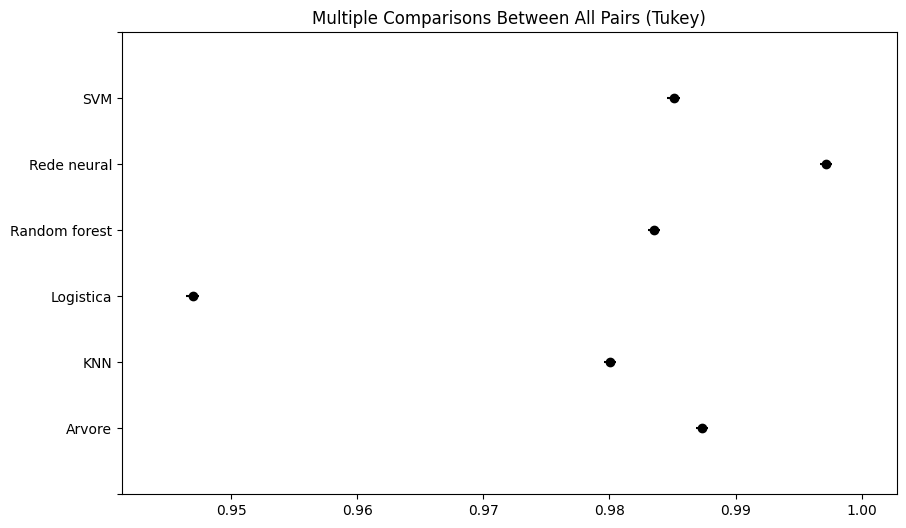

In [52]:
statistic_test.plot_simultaneous();

In [50]:
statistic_test.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Arvore,KNN,-0.0073,0.0,-0.0082,-0.0063,True
Arvore,Logistica,-0.0404,0.0,-0.0413,-0.0394,True
Arvore,Random forest,-0.0038,0.0,-0.0047,-0.0028,True
Arvore,Rede neural,0.0099,0.0,0.0089,0.0108,True
Arvore,SVM,-0.0022,0.0,-0.0032,-0.0013,True
KNN,Logistica,-0.0331,0.0,-0.0341,-0.0321,True
KNN,Random forest,0.0035,0.0,0.0025,0.0045,True
KNN,Rede neural,0.0171,0.0,0.0162,0.0181,True
KNN,SVM,0.005,0.0,0.0041,0.006,True
Logistica,Random forest,0.0366,0.0,0.0356,0.0376,True


# Salvar um classificador treinado

In [53]:
with open('../../assets/credit.pkl', 'rb') as file:
  X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(file)

In [54]:
X_credit = np.concatenate((X_credit_train, X_credit_test), axis = 0)
y_credit = np.concatenate((y_credit_train, y_credit_test), axis = 0)

In [55]:
X_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [57]:
reural_network_classifier = MLPClassifier(activation='relu', batch_size = 56, solver='adam')
reural_network_classifier.fit(X_credit, y_credit)

/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [58]:
tree_classifier = DecisionTreeClassifier(
    criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
tree_classifier.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [59]:
svm_classifier = SVC(C = 2.0, kernel='rbf', probability=True)
svm_classifier.fit(X_credit, y_credit)

SVC(C=2.0, probability=True)

In [60]:
import pickle

pickle.dump(reural_network_classifier, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(tree_classifier, open('arvore_finalizado.sav', 'wb'))
pickle.dump(svm_classifier, open('svm_finalizado.sav', 'wb'))

# Carregar um classificador já treinado

In [61]:
neural_network = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
tree = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [62]:
new_record = X_credit[1999]
new_record

array([-1.03572293, -0.93978209,  0.04244312])

In [63]:
new_record.shape

(3,)

In [64]:
new_record = new_record.reshape(1, -1) # transforma um array unidimensional e bidimensional
new_record.shape

(1, 3)

In [65]:
new_record

array([[-1.03572293, -0.93978209,  0.04244312]])

In [66]:
neural_network.predict(new_record)

array([1])

In [67]:
tree.predict(new_record)

array([1])

In [68]:
svm.predict(new_record)

array([1])